# TMDB Movie Data set Analysis & Recommender System 
##### By: Sathwik Kesappragada

Does the recommended section provide satisfaction? Are the movie suggestions popping up elevate anyone’s mood? Do the advertisements appearing in between Instagram posts catch anybody’s attention? Is there a system that gives better movie suggestions? 

From the moment an individual unlocks his/her phone till the moment he/she puts it away, every action being committed is tracked and monitored, stored into data, that is confidential information sold to big corporations. Pew Research states that 81% of Americans own smartphones creating a push for relevant and accurate promotions that will influence a user’s decision-making process and attract customers. With complex supervision, people with smartphones are being schemed to stay on their cellular devices for longer periods of time to generate more revenue. Why? Companies with money can afford exceptional marketing. According to Business Wire, 60% of consumers click on cellphone ads every week suggesting how prevalent mobile advertising has become. Given these points, everyone is simply surrounded by recommender systems; people are constantly getting pitched ideas. From a simple Google search to a YouTube video to a Netflix original and to a song on Spotify, there exists a machine that advises its user based off of abundant data. 

## Part I.) Data Exploration & Data Wrangling

#### Imports

In [1]:
#call all import statements and their necessary pacakges
import sys
import ast
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import numpy as np
from ast import literal_eval
import seaborn as sns
import os
import missingno as msno 

In [2]:
#load data into variable
movies = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/IMDB-Movie-Ratings/rawdata/movies_metadata.csv', index_col = 'title', low_memory = False, nrows = 46000)
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0
Jumanji,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0
Grumpier Old Men,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0
Waiting to Exhale,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0
Father of the Bride Part II,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0


In [3]:
#45466 movies 
movies.shape

(45466, 23)

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45466 entries, Toy Story to Queerama
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 

### Columns/Features:
- adult: points out whether the film is Adult or X-Rated
- belongs_to_collection: tells us the movie series/franchise a film belongs to 
- budget: budget of the film in dollars
- genres: genres/classes associated with each movie
- homepage: official homepage of the movie
- id: movie ID
- imdb_id: imdb ID of the film 
- original_language: the language the film was officially shot in
- original_title: the name of the movie upon release
- overview: brief summary of the plot
- popularity: popularity score that indicates how well known the film is
- poster_path: URL of the movie poster image
- production_companies: companies involved in the making of the film
- production_countries: countries where the movie was released/shot in 
- release_date: theatrical release date 
- revenue: total return of the film
- runtime: number in minutes length of film 
- spoken_languages: languages spoken in the film 
- status: Released, Rumored, Post-Production, etc.
- tagline: punch line/catch phrase
- video: whether or not if there is a video of the film present on TMDB
- vote_average: average score of the movie 
- vote_count: the number of votes by users 

In [5]:
movies.id.value_counts()

141971    3
12600     2
5511      2
42495     2
14788     2
         ..
371449    1
305019    1
25796     1
70054     1
85242     1
Name: id, Length: 45436, dtype: int64

In [6]:
type(movies['budget'].iloc[0])

str

In [7]:
type(movies['popularity'].iloc[0])

str

In [8]:
type(movies['genres'].iloc[0])

str

In [9]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['popularity'] = pd.to_numeric(movies['popularity'], errors = 'coerce')

In [10]:
#returns all movie titles
movies.index

Index([                  'Toy Story',                     'Jumanji',
                  'Grumpier Old Men',           'Waiting to Exhale',
       'Father of the Bride Part II',                        'Heat',
                           'Sabrina',                'Tom and Huck',
                      'Sudden Death',                   'GoldenEye',
       ...
                  'House of Horrors',   'Shadow of the Blair Witch',
               'The Burkittsville 7',             'Caged Heat 3000',
                        'Robin Hood',                      'Subdue',
               'Century of Birthing',                    'Betrayal',
                  'Satan Triumphant',                    'Queerama'],
      dtype='object', name='title', length=45466)

In [11]:
#looking at one record and all of its information
movies[movies.original_title == 'Toy Story'].transpose()

title,Toy Story
adult,FALSE
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,3e+07
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
homepage,http://toystory.disney.com/toy-story
id,862
imdb_id,tt0114709
original_language,en
original_title,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ..."


In [12]:
#removes irrelevant information and returns just genres
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [13]:
#similar to top, only displays country names
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [14]:
#cleanly organizes the column to simply display only companies 
#movies['production_companies'] = movies['production_companies'].fillna('[]').apply(ast.literal_eval)
#movies['production_companies'] = movies['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [15]:
#checking how many null values there are for each column/feature
missing = pd.concat([movies.isnull().sum(), 100 * movies.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
belongs_to_collection,40972,90.115691
homepage,37684,82.883913
tagline,25054,55.104914
overview,954,2.098271
poster_path,386,0.848986
runtime,263,0.578454
release_date,87,0.191352
status,87,0.191352
imdb_id,17,0.037391
original_language,11,0.024194


<function matplotlib.pyplot.show(*args, **kw)>

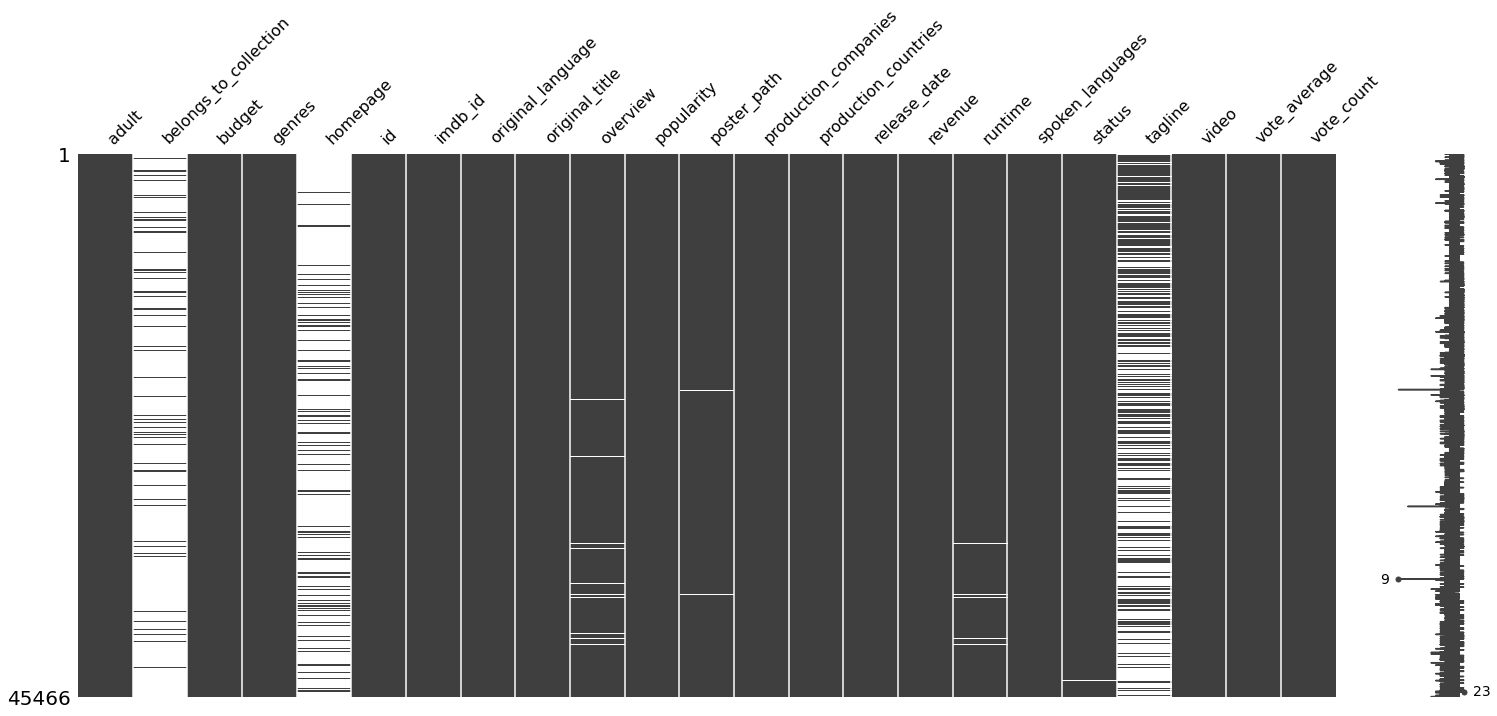

In [16]:
msno.matrix(movies)
plt.show

In [17]:
movies[movies.vote_count.isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
NaN,FALSE,NaN,0.0,"[Action, Thriller, Drama]",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,- Written by Ørnås,0.065736,NaN,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",8/20/1997,0,104,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,[],1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,FALSE,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0.0,"[Animation, Science Fiction]",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Rune Balot goes to a casino connected to the ...,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/29/2012,0,68,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,[],12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,FALSE,NaN,0.0,"[TV Movie, Action, Horror, Science Fiction]",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalanche Sharks tells the story of a bikini ...,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",1/1/2014,0,82,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,[],22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
movies = movies[~movies.vote_count.isnull()]

In [19]:
movies.shape

(45460, 23)

In [20]:
movies[movies['vote_average'].isna()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,


looking for duplicate values

In [21]:
#looking for duplicates in movie title
movies['original_title'].value_counts().head(15)

Hamlet                           8
Alice in Wonderland              8
Les Misérables                   7
Macbeth                          7
The Three Musketeers             7
Cinderella                       7
A Christmas Carol                7
The Hound of the Baskervilles    6
Blackout                         6
Jane Eyre                        6
King Lear                        6
Frankenstein                     6
Wuthering Heights                6
Treasure Island                  6
Heidi                            6
Name: original_title, dtype: int64

In [22]:
#sometimes movies with the same title are released
#you can tell theyre different by looking at release dates
movies[movies['original_title'] == 'Macbeth'].transpose()

title,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,A Performance of Macbeth,Macbeth
adult,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,1.5e+07,0,0
genres,[Drama],[Drama],[Thriller],"[Thriller, Drama, Action]","[History, Drama, War]","[Drama, Foreign]",[Drama]
homepage,NaN,NaN,NaN,NaN,http://www.macbeth-movie.com/,NaN,NaN
id,27883,115427,119844,13775,225728,41149,133448
imdb_id,tt0040558,tt0292081,tt0084284,tt0434541,tt2884018,tt0079499,tt1570337
original_language,en,hu,en,en,en,en,en
original_title,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth
overview,Orson Welles' unique take on Shakespeare's cla...,A Hungarian TV version of the play shot in jus...,Macbeth and his wife murder Duncan in order to...,"Macbeth, loyal to his crime boss, Duncan, is t...",Feature film adaptation of Shakespeare's Scott...,"Shakespeare's classic tragedy of ambition, wit...",Part of the PBS Great Performance Series. Reno...


In [23]:
#another method to identify duplicates 
(movies['original_title'] + ', ' + movies['release_date']).value_counts()

Blackout, 12/26/2008                                          3
Why We Fight: Divide and Conquer, 1/1/1943                    2
The Warrior, 9/23/2001                                        2
Confessions of a Dangerous Mind, 12/30/2002                   2
Offside, 5/26/2006                                            2
                                                             ..
L'incruste, 3/1/2004                                          1
The Book of Mormon Movie, Volume 1: The Journey, 9/12/2003    1
Plain Dirty, 1/20/2003                                        1
Last Passenger, 10/18/2013                                    1
Neighbours, 1/1/1952                                          1
Length: 45346, dtype: int64

A way to identify duplicates within the data set was by checking unique values in combos.  
Movies that share the same title and release date are repeating records that needs to be dropped. 

In [24]:
#literally everything is same
movies[movies['original_title'] == 'Blackout'].transpose()

title,Blackout,Blackout,Blackout,Blackout,Blackout,Blackout
adult,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,0,0
genres,"[Thriller, Mystery]","[Thriller, Mystery]","[Thriller, Mystery]","[Action, Thriller]","[Horror, Thriller]",[Documentary]
homepage,NaN,NaN,NaN,NaN,NaN,http://www.pbs.org/wgbh/americanexperience/fil...
id,141971,141971,141971,100063,226630,416951
imdb_id,tt1180333,tt1180333,tt1180333,tt0077241,tt0088816,tt4284046
original_language,fi,fi,fi,en,en,en
original_title,Blackout,Blackout,Blackout,Blackout,Blackout,Blackout
overview,Recovering from a nail gun shot to the head an...,Recovering from a nail gun shot to the head an...,Recovering from a nail gun shot to the head an...,A black comedy of violent criminals who terror...,A police officer suspects that a local husband...,"First responders, journalists, shop owners, th..."


In [25]:
movies[['original_title', 'release_date']].nunique()

original_title    43367
release_date      17333
dtype: int64

In [26]:
movies = movies.drop_duplicates(subset=['original_title', 'release_date'])

In [27]:
(movies['original_title'] + ', ' + movies['release_date']).value_counts()

퀵, 7/21/2011                                                          1
The Master, 1/1/2017                                                  1
Starlet, 11/9/2012                                                    1
Burning Bright, 5/2/2012                                              1
Pooh's Grand Adventure: The Search for Christopher Robin, 8/5/1997    1
                                                                     ..
Oublier Cheyenne, 4/1/2005                                            1
Faust et Méphistophélès, 1/1/1903                                     1
Three on a Meathook, 1/1/1973                                         1
Dügün Dernek 2: Sünnet, 12/4/2015                                     1
Neighbours, 1/1/1952                                                  1
Length: 45346, dtype: int64

In [28]:
movies[movies['original_title']=='Blackout'].transpose()

title,Blackout,Blackout,Blackout,Blackout
adult,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN
budget,0,0,0,0
genres,"[Thriller, Mystery]","[Action, Thriller]","[Horror, Thriller]",[Documentary]
homepage,NaN,NaN,NaN,http://www.pbs.org/wgbh/americanexperience/fil...
id,141971,100063,226630,416951
imdb_id,tt1180333,tt0077241,tt0088816,tt4284046
original_language,fi,en,en,en
original_title,Blackout,Blackout,Blackout,Blackout
overview,Recovering from a nail gun shot to the head an...,A black comedy of violent criminals who terror...,A police officer suspects that a local husband...,"First responders, journalists, shop owners, th..."


In [29]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors = 'coerce')
oldest_movie_bydate = movies.release_date.min()
most_recent_bydate = movies.release_date.max()

In [30]:
print(oldest_movie_bydate)
print(most_recent_bydate)

1874-12-09 00:00:00
2020-12-16 00:00:00


In [31]:
movies[movies['release_date'] == oldest_movie_bydate]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Passage of Venus,FALSE,NaN,0.0,[Documentary],NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,[France],1874-12-09,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,False,6.0,19.0


In [32]:
movies[movies['release_date'] == most_recent_bydate]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Avatar 2,FALSE,"{'id': 87096, 'name': 'Avatar Collection', 'po...",0.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,76600,tt1630029,en,Avatar 2,A sequel to Avatar (2009).,...,[United States of America],2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,False,0.0,58.0


In [33]:
movies[movies['release_date'] > '2018-01-01 00:00:00']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Avatar 2,FALSE,"{'id': 87096, 'name': 'Avatar Collection', 'po...",0.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,76600,tt1630029,en,Avatar 2,A sequel to Avatar (2009).,...,[United States of America],2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,False,0.0,58.0
Bad Boys for Life,FALSE,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0.0,"[Thriller, Action, Crime]",NaN,38700,tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,...,[United States of America],2018-11-07,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,False,0.0,12.0
Iron Sky: The Coming Race,FALSE,"{'id': 312977, 'name': 'Iron Sky Collection', ...",18000000.0,"[Action, Comedy, Fantasy, Science Fiction]",http://www.ironsky.net/,302349,tt3038708,en,Iron Sky: The Coming Race,"Twenty years after the events of Iron Sky, the...",...,"[Belgium, Finland, Germany]",2018-03-01,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Post Production,NaN,False,0.0,0.0
Mary Shelley,FALSE,NaN,0.0,"[Drama, Romance]",NaN,332283,tt3906082,en,Mary Shelley,The love affair between poet Percy Shelley and...,...,"[Ireland, Luxembourg, United Kingdom]",2018-04-25,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0
The Other Side of the Wind,FALSE,NaN,12000000.0,"[Comedy, Drama]",NaN,299782,tt0069049,en,The Other Side of the Wind,"Orson Welles' unfinished masterpiece, restored...",...,"[Iran, United States of America]",2018-12-31,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0
Mobile Homes,FALSE,NaN,0.0,[Drama],NaN,412059,tt5613402,en,Mobile Homes,"In forgotten towns along the American border, ...",...,"[France, Canada]",2018-04-04,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0


In [34]:
movies['adult'].value_counts(normalize=True)

FALSE    0.999802
TRUE     0.000198
Name: adult, dtype: float64

In [35]:
movies['year'] = movies['release_date'].dt.year
movies['year'].head(10)

title
Toy Story                      1995.0
Jumanji                        1995.0
Grumpier Old Men               1995.0
Waiting to Exhale              1995.0
Father of the Bride Part II    1995.0
Heat                           1995.0
Sabrina                        1995.0
Tom and Huck                   1995.0
Sudden Death                   1995.0
GoldenEye                      1995.0
Name: year, dtype: float64

In [36]:
movies['day'] = movies['release_date'].dt.day
movies['month'] = movies['release_date'].dt.month

In [37]:
movies.year.value_counts().head(10)

2014.0    1973
2015.0    1904
2013.0    1887
2012.0    1721
2011.0    1666
2016.0    1604
2009.0    1585
2010.0    1501
2008.0    1470
2007.0    1319
Name: year, dtype: int64

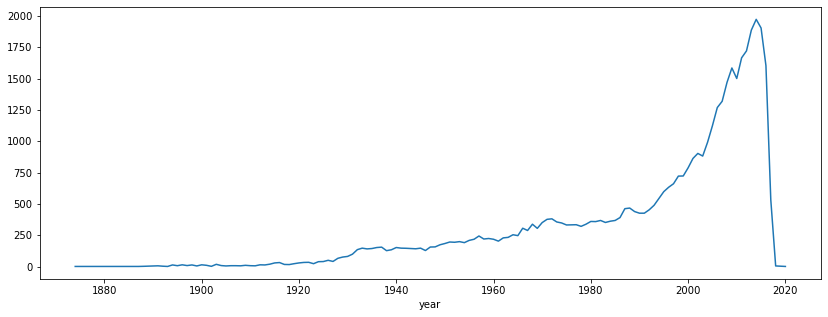

In [38]:
count_by_year = movies.groupby('year')['original_title'].count()
plt.figure(figsize=(14,5))
count_by_year.plot()

In [39]:
movies.month.value_counts().head(10)

1.0     5909
9.0     4834
10.0    4613
12.0    3781
11.0    3661
3.0     3549
4.0     3452
8.0     3393
5.0     3337
6.0     3151
Name: month, dtype: int64

In [40]:
movies.day.value_counts().head(10)

1.0     5836
15.0    1534
10.0    1481
6.0     1454
9.0     1442
18.0    1442
25.0    1435
12.0    1433
14.0    1423
11.0    1416
Name: day, dtype: int64

In [41]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
months = list(months)

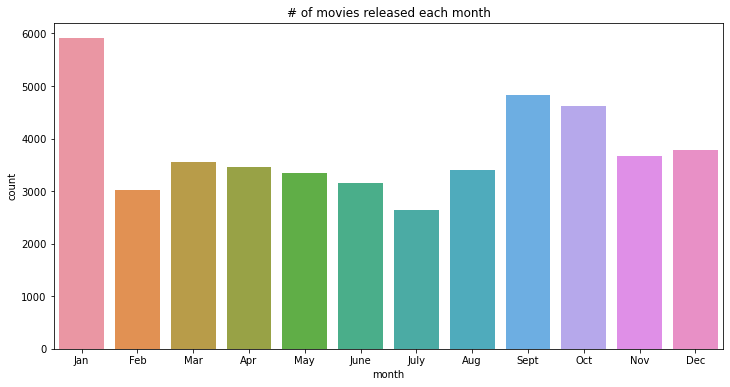

In [42]:
_= plt.figure(figsize=(12,6))
_= sns.countplot(x='month', data=movies)
locs, labels=plt.xticks()
_= plt.title('# of movies released each month')
_ = plt.xticks(locs, months)
plt.show()

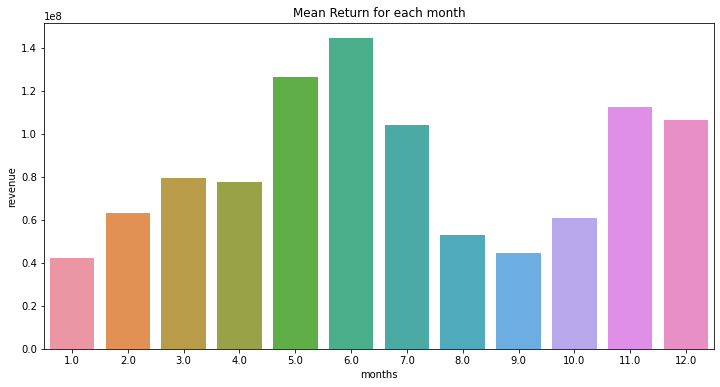

In [43]:
movie_month_mean = pd.DataFrame(movies[movies['revenue'] > 1e6].groupby('month')['revenue'].mean())
movie_month_mean['months'] = movie_month_mean.index
_= plt.figure(figsize=(12,6))
_= sns.barplot(x='months', y= 'revenue', data=movie_month_mean)
_= plt.title('Mean Return for each month')
plt.show()

In [44]:
# approximately 11% of movies in this dataset are drama
movies['genres'].value_counts().head(10)

[Drama]                     4996
[Comedy]                    3620
[Documentary]               2721
[]                          2442
[Drama, Romance]            1300
[Comedy, Drama]             1133
[Horror]                     974
[Comedy, Romance]            930
[Comedy, Drama, Romance]     593
[Drama, Comedy]              531
Name: genres, dtype: int64

In [45]:
movies['genres'].filter(regex= 'Drama|Comedy').count()

59

In [46]:
#print(movies.columns.isin(movies.genres).any())
# every movie record has a diff number of genres 
# returns number of how many genres are listed under each film
movies['num_genres'] = movies['genres'].str.len()
print(movies['num_genres'])   

title
Toy Story                      3
Jumanji                        3
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    1
                              ..
Subdue                         2
Century of Birthing            1
Betrayal                       3
Satan Triumphant               0
Queerama                       0
Name: num_genres, Length: 45430, dtype: int64


In [47]:
#checking to see how many 0s there are in each column
# 0s have a different meaning than null values 
zeros = pd.concat([(movies == 0).astype(int).sum(axis=0), 100 * (movies == 0).astype(int).mean(axis=0)], axis=1)
zeros.columns=['count', '%']
zeros.sort_values(by='%', ascending = False)

,count,%
video,45337,99.795289
revenue,38032,83.715606
budget,36550,80.453445
vote_average,2995,6.592560
vote_count,2896,6.374642
num_genres,2442,5.375303
runtime,1558,3.429452
popularity,66,0.145278
month,0,0.000000
day,0,0.000000


In [48]:
# 32% of movies have only one genre
# 5% doesn't even have a genre listed
# 1.83% of movies have 5 genres 
movies['num_genres'].value_counts(normalize=True) #2442 movies don't have any genre 

1    0.320317
2    0.318512
3    0.210808
4    0.074312
0    0.053753
5    0.018248
6    0.003456
7    0.000528
8    0.000066
Name: num_genres, dtype: float64

In [49]:
movies['num_genres']

title
Toy Story                      3
Jumanji                        3
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    1
                              ..
Subdue                         2
Century of Birthing            1
Betrayal                       3
Satan Triumphant               0
Queerama                       0
Name: num_genres, Length: 45430, dtype: int64

In [50]:
# of movies by country 
movies_by_country = pd.DataFrame(movies['production_countries'].value_counts())
movies_by_country['country'] = movies_by_country.index
movies_by_country.columns = ['# of movies', 'country'] 
movies_by_country= movies_by_country.reset_index().drop('index', axis=1)

In [51]:
movies_by_country.head(10)

,# of movies,country
0,17841,[United States of America]
1,6279,[]
2,2238,[United Kingdom]
3,1653,[France]
4,1354,[Japan]
5,1030,[Italy]
6,840,[Canada]
7,748,[Germany]
8,735,[India]
9,735,[Russia]


In [52]:
# of Movies by Language 
num_lang = pd.DataFrame(movies['original_language'].value_counts())
num_lang['language'] = num_lang.index
num_lang.columns = ['# of movies', 'language']
num_lang.head(10)

,# of movies,language
en,32249,en
fr,2436,fr
it,1529,it
ja,1346,ja
de,1079,de
es,994,es
ru,826,ru
hi,508,hi
ko,444,ko
zh,409,zh


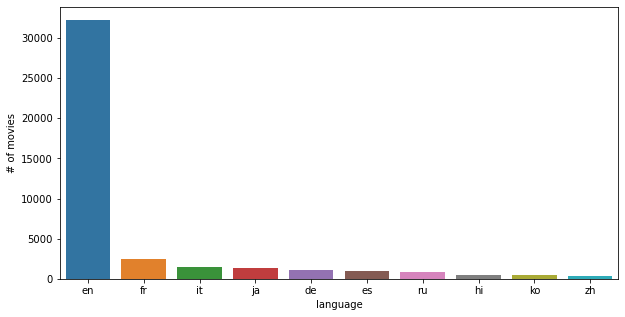

In [53]:
#top 10 by language
plt.figure(figsize=(10,5))
sns.barplot(x='language', y='# of movies', data=num_lang.iloc[0:10])
plt.show()

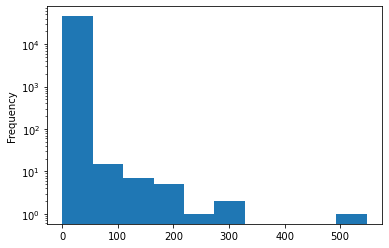

In [54]:
movies['popularity'].plot(logy=True,kind='hist')

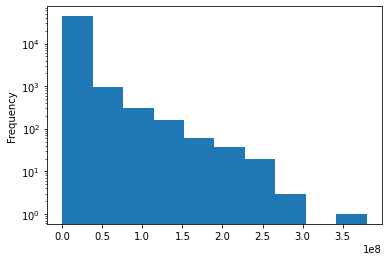

In [55]:
movies['budget'].plot(logy=True, kind='hist')

In [56]:
#top 10 movies by popularity
movies[['popularity', 'release_date']].sort_values('popularity', ascending=False).head(10)

,popularity,release_date
title,,
Minions,547.488298,2015-06-17
Wonder Woman,294.337037,2017-05-30
Beauty and the Beast,287.253654,2017-03-16
Baby Driver,228.032744,2017-06-28
Big Hero 6,213.849907,2014-10-24
Deadpool,187.860492,2016-02-09
Guardians of the Galaxy Vol. 2,185.330992,2017-04-19
Avatar,185.070892,2009-12-10
John Wick,183.870374,2014-10-22


In [57]:
#top 10 movies based on vote_count
movies[['vote_count', 'release_date']].sort_values('vote_count', ascending=False).head(10)

,vote_count,release_date
title,,
Inception,14075.0,2010-07-14
The Dark Knight,12269.0,2008-07-16
Avatar,12114.0,2009-12-10
The Avengers,12000.0,2012-04-25
Deadpool,11444.0,2016-02-09
Interstellar,11187.0,2014-11-05
Django Unchained,10297.0,2012-12-25
Guardians of the Galaxy,10014.0,2014-07-30
Fight Club,9678.0,1999-10-15


In [58]:
#top 10 grossed movies
movies[movies['revenue']>0][['revenue', 'release_date']].sort_values('revenue', ascending=False).head(10)

,revenue,release_date
title,,
Avatar,2.787965e+09,2009-12-10
Star Wars: The Force Awakens,2.068224e+09,2015-12-15
Titanic,1.845034e+09,1997-11-18
The Avengers,1.519558e+09,2012-04-25
Jurassic World,1.513529e+09,2015-06-09
Furious 7,1.506249e+09,2015-04-01
Avengers: Age of Ultron,1.405404e+09,2015-04-22
Harry Potter and the Deathly Hallows: Part 2,1.342000e+09,2011-07-07
Frozen,1.274219e+09,2013-11-27


In [59]:
#top 10 most expensive movies
movies[movies['budget'] > 0][['budget','revenue', 'release_date']].sort_values('budget', ascending=False).head(10)

,budget,revenue,release_date
title,,,
Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2011-05-14
Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,2007-05-19
Avengers: Age of Ultron,280000000.0,1.405404e+09,2015-04-22
Superman Returns,270000000.0,3.910812e+08,2006-06-28
Transformers: The Last Knight,260000000.0,6.049421e+08,2017-06-21
Tangled,260000000.0,5.917949e+08,2010-11-24
John Carter,260000000.0,2.841391e+08,2012-03-07
Spider-Man 3,258000000.0,8.908716e+08,2007-05-01
The Lone Ranger,255000000.0,8.928991e+07,2013-07-03


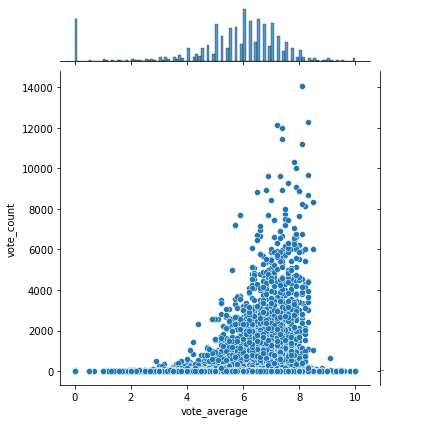

In [60]:
_ = sns.jointplot(x='vote_average', y='vote_count', data=movies)
plt.show()

In [61]:
# you can notice that all of these listed have very long runtimes and that these are actually mini-series
movies[movies['runtime'] >0][['runtime','release_date']].sort_values('runtime', ascending=False).head(10)

,runtime,release_date
title,,
Centennial,1256.0,1978-10-01
Jazz,1140.0,2001-01-09
Baseball,1140.0,1994-09-18
Berlin Alexanderplatz,931.0,1980-08-28
Heimat: A Chronicle of Germany,925.0,1984-09-16
The Story of Film: An Odyssey,900.0,2011-09-03
Taken,877.0,2002-12-02
The War,874.0,2007-09-23
The Roosevelts: An Intimate History,840.0,2014-09-15


In [62]:
# top 10 shortest movies
movies[movies['runtime'] >0][['runtime','release_date']].sort_values('runtime').head(10)

,runtime,release_date
title,,
Mr. Edison at Work in His Chemical Laboratory,1.0,1897-05-31
Grandma's Reading Glass,1.0,1900-11-01
"What Happened on Twenty-Third Street, New York City",1.0,1901-07-31
The Magician,1.0,1898-01-01
Panorama pris d'un train en marche,1.0,1898-01-01
"Divers at Work on the Wreck of the ""Maine""",1.0,1898-01-01
After the Ball,1.0,1897-01-01
Between Calais and Dover,1.0,1897-01-01
The Surrender of Tournavos,1.0,1897-01-01


In [63]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,45430.0,4.224828e+06,1.742853e+07,0.0,0.000000,0.000000,0.000000,3.800000e+08
popularity,45430.0,2.921206e+00,6.006708e+00,0.0,0.385872,1.127238,3.678128,5.474883e+02
revenue,45430.0,1.121288e+07,6.435213e+07,0.0,0.000000,0.000000,0.000000,2.787965e+09
runtime,45173.0,9.412430e+01,3.841554e+01,0.0,85.000000,95.000000,107.000000,1.256000e+03
vote_average,45430.0,5.618329e+00,1.924139e+00,0.0,5.000000,6.000000,6.800000,1.000000e+01
vote_count,45430.0,1.099360e+02,4.914663e+02,0.0,3.000000,10.000000,34.000000,1.407500e+04
year,45346.0,1.991883e+03,2.405304e+01,1874.0,1978.000000,2001.000000,2010.000000,2.020000e+03
day,45346.0,1.420948e+01,9.283747e+00,1.0,6.000000,14.000000,22.000000,3.100000e+01
month,45346.0,6.459225e+00,3.628039e+00,1.0,3.000000,7.000000,10.000000,1.200000e+01
num_genres,45430.0,2.003214e+00,1.130713e+00,0.0,1.000000,2.000000,3.000000,8.000000e+00


In [64]:
movie_with_one = movies[movies['num_genres'] == 1]

In [65]:
movie_with_one.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,14552.0,1.476017e+06,7.644903e+06,0.0,0.000000,0.000000,0.000000,1.900000e+08
popularity,14552.0,1.929592e+00,3.115950e+00,0.0,0.247577,0.766259,2.017234,6.429999e+01
revenue,14552.0,3.710493e+06,2.600311e+07,0.0,0.000000,0.000000,0.000000,1.506249e+09
runtime,14430.0,9.020312e+01,4.027209e+01,0.0,82.000000,92.000000,104.000000,1.140000e+03
vote_average,14552.0,5.582992e+00,2.117373e+00,0.0,5.000000,6.000000,6.900000,1.000000e+01
vote_count,14552.0,4.617159e+01,2.135003e+02,0.0,2.000000,7.000000,20.000000,9.678000e+03
year,14540.0,1.992693e+03,2.499988e+01,1874.0,1978.000000,2004.000000,2012.000000,2.018000e+03
day,14540.0,1.400812e+01,9.327033e+00,1.0,6.000000,14.000000,22.000000,3.100000e+01
month,14540.0,6.389959e+00,3.657803e+00,1.0,3.000000,6.000000,10.000000,1.200000e+01
num_genres,14552.0,1.000000e+00,0.000000e+00,1.0,1.000000,1.000000,1.000000,1.000000e+00


In [66]:
movie_with_two = movies[movies['num_genres'] == 2]

Text(0, 0.5, 'Genres')

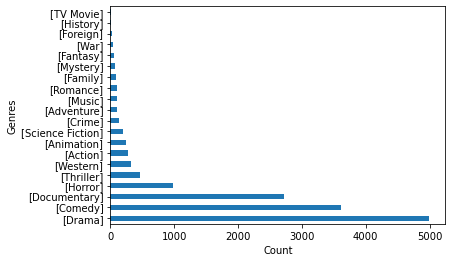

In [67]:
movie_with_one['genres'].value_counts().plot(kind='barh') # 20 unique single genres
plt.xlabel('Count')
plt.ylabel('Genres')   

Text(0, 0.5, 'Genres')

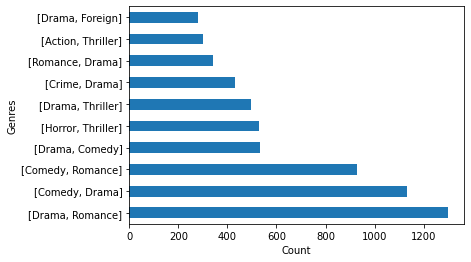

In [68]:
movie_with_two['genres'].value_counts().head(10).plot(kind ='barh') #303 unique pairs
plt.xlabel('Count')
plt.ylabel('Genres')

**movies with one genre listed only**

In [69]:
movie_genres_key=movie_with_one['genres'].apply(lambda x: '_'.join((map(str,x))))

In [70]:
print(type(movie_genres_key))

<class 'pandas.core.series.Series'>


In [71]:
sns.set()

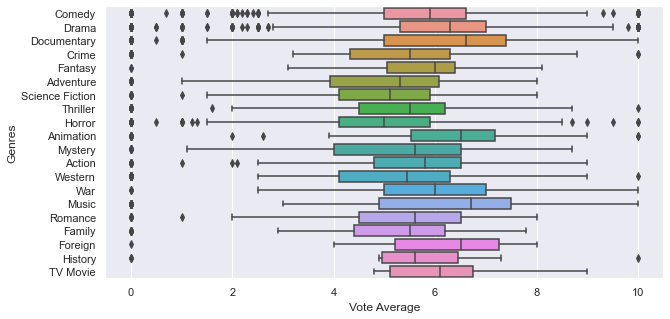

In [72]:
_ = plt.figure(figsize=(10,5))
_ = sns.boxplot(data = movie_with_one, y=movie_genres_key, x='vote_average', orient = "h")
_ = plt.xlabel('Vote Average')
_ = plt.ylabel('Genres')
plt.show()

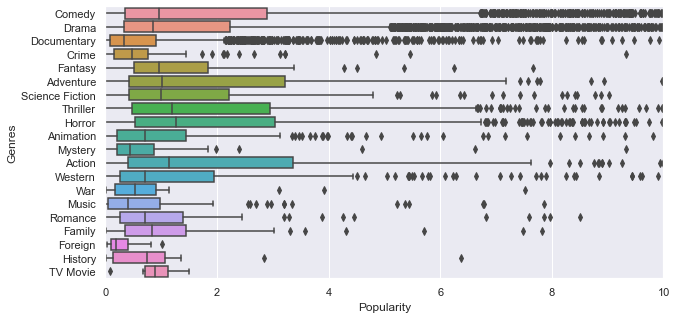

In [73]:
#zoomed into the plot for a better view
_ = plt.figure(figsize=(10,5))
_ = sns.boxplot(data = movie_with_one, y=movie_genres_key, x='popularity', orient = "h")
_ = plt.xlabel('Popularity')
_ = plt.ylabel('Genres')
_ = plt.xlim(0,10)
plt.show()

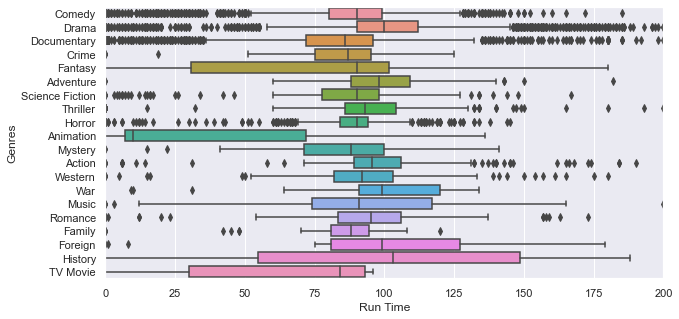

In [74]:
#zoomed into the plot for a better view
_ = plt.figure(figsize=(10,5))
_ = sns.boxplot(data = movie_with_one, y=movie_genres_key, x='runtime', orient = "h")
_ = plt.xlabel('Run Time')
_ = plt.ylabel('Genres')
_ = plt.xlim(0,200)
plt.show()

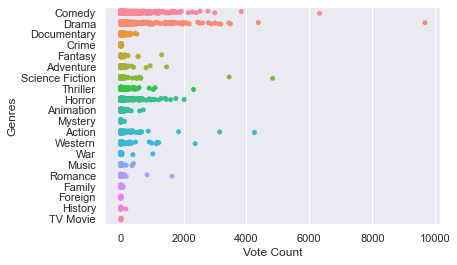

In [75]:
_ = sns.stripplot(data = movie_with_one, y=movie_genres_key, x = 'vote_count', jitter=True)
_ = plt.xlabel('Vote Count')
_ = plt.ylabel('Genres')

In [76]:
#_ = plt.hist('vote_count','vote_average', bins=(10,10))
#plt.show()

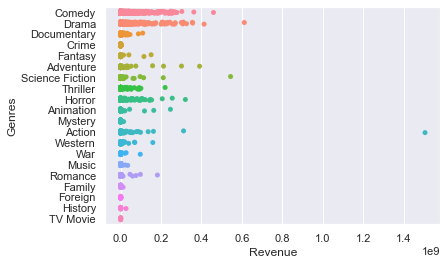

In [77]:
_ = sns.stripplot(data = movie_with_one, y=movie_genres_key, x='revenue')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Genres')
plt.show()

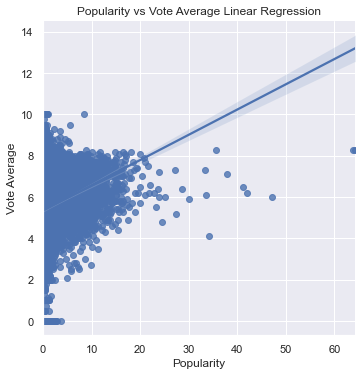

In [78]:
_ = sns.lmplot(x='popularity', y='vote_average', data=movie_with_one)
_ = plt.xlabel('Popularity')
_ = plt.ylabel('Vote Average')
_ = plt.title('Popularity vs Vote Average Linear Regression')
plt.show()

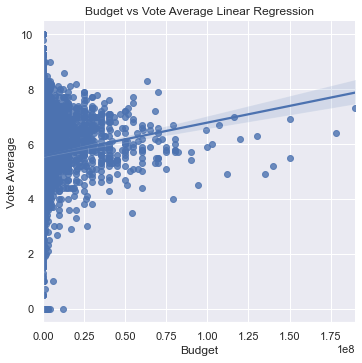

In [79]:
_ = sns.lmplot(x='budget', y='vote_average', data=movie_with_one,palette='Set1')
_ = plt.xlabel('Budget')
_ = plt.ylabel('Vote Average')
_ = plt.title('Budget vs Vote Average Linear Regression')
plt.show()

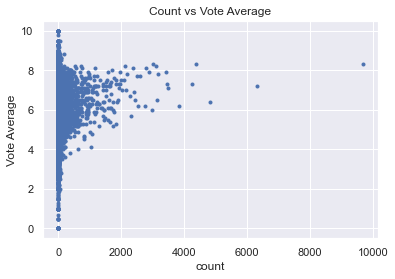

In [80]:
_ = plt.plot(movie_with_one['vote_count'], movie_with_one['vote_average'], marker='.', linestyle='none')
_ = plt.xlabel('count')
_ = plt.ylabel('Vote Average')
_ = plt.title('Count vs Vote Average')
plt.show()

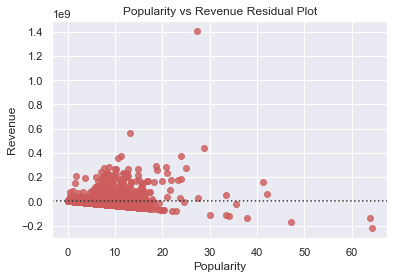

In [81]:
_ = sns.residplot(x= 'popularity', y= 'revenue', data=movie_with_one, color = 'indianred')
_ = plt.xlabel('Popularity')
_ = plt.ylabel('Revenue')
_ = plt.title('Popularity vs Revenue Residual Plot')

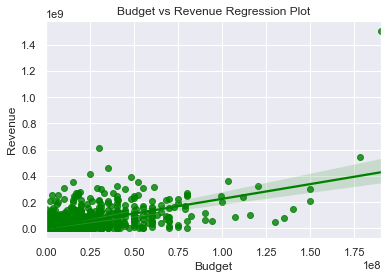

In [82]:
_ = sns.regplot(x= 'budget', y= 'revenue', data=movie_with_one, color = 'green')
_ = plt.xlabel('Budget')
_ = plt.ylabel('Revenue')
_ = plt.title('Budget vs Revenue Regression Plot')

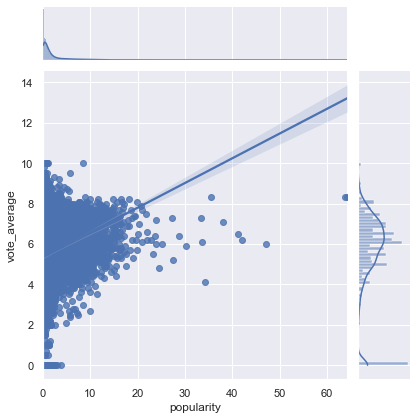

In [83]:
sns.jointplot(x="popularity", y="vote_average", data=movie_with_one, kind="reg");

In [84]:
stats = pd.DataFrame(movie_with_one.groupby(movie_genres_key).describe())

In [85]:
stats.columns

MultiIndex([(      'budget', 'count'),
            (      'budget',  'mean'),
            (      'budget',   'std'),
            (      'budget',   'min'),
            (      'budget',   '25%'),
            (      'budget',   '50%'),
            (      'budget',   '75%'),
            (      'budget',   'max'),
            (  'popularity', 'count'),
            (  'popularity',  'mean'),
            (  'popularity',   'std'),
            (  'popularity',   'min'),
            (  'popularity',   '25%'),
            (  'popularity',   '50%'),
            (  'popularity',   '75%'),
            (  'popularity',   'max'),
            (     'revenue', 'count'),
            (     'revenue',  'mean'),
            (     'revenue',   'std'),
            (     'revenue',   'min'),
            (     'revenue',   '25%'),
            (     'revenue',   '50%'),
            (     'revenue',   '75%'),
            (     'revenue',   'max'),
            (     'runtime', 'count'),
            (     'runtim

In [86]:
stats.columns = ['budget_count','budget_mean','budget_std','budget_min', 'budget_25p', 'budget_50p', 'budget_75p', 'budget_max',
'popularity_count','popularity_mean','popularity_std','popularity_min', 'popularity_25p', 'popularity_50p', 'popularity_75p', 'popularity_max',
'revenue_count','revenue_mean','revenue_std','revenue_min', 'revenue_25p', 'revenue_50p', 'revenue_75p', 'revenue_max',                 
'runtime_count','runtime_mean','runtime_std','runtime_min', 'runtime_25p', 'runtime_50p', 'runtime_75p', 'runtime_max',
'vote_average_count','vote_average_mean','vote_average_std','vote_average_min', 'vote_average_25p', 'vote_average_50p', 'vote_average_75p', 'vote_average_max',
'vote_count_count', 'vote_count_mean', 'vote_count_std','vote_count_min', 'vote_count_25p', 'vote_count_50p', 'vote_count_75p', 'vote_count_max',
'year_count', 'year_mean', 'year_std', 'year_min', 'year_25p','year_50p', 'year_75p', 'year_max', 
'day_count', 'day_mean', 'day_std', 'day_min', 'day_25p', 'day_50p', 'day_75p', 'day_max', 
'month_count', 'month_mean', 'month_std', 'month_min', 'month_25p','month_50p', 'month_75p', 'month_max',
'num_genres_count','num_genres_mean','num_genres_std','num_genres_min', 'num_genres_25p', 'num_genres_50p', 'num_genres_75p', 'num_genres_max']

In [87]:
stats

,budget_count,budget_mean,budget_std,budget_min,budget_25p,budget_50p,budget_75p,budget_max,popularity_count,popularity_mean,...,month_75p,month_max,num_genres_count,num_genres_mean,num_genres_std,num_genres_min,num_genres_25p,num_genres_50p,num_genres_75p,num_genres_max
genres,,,,,,,,,,,,,,,,,,,,,
Action,278.0,4.572418e+06,1.744645e+07,0.0,0.0,0.0,0.0,190000000.0,278.0,2.781620,...,9.0,12.0,278.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Adventure,110.0,7.870664e+06,2.310080e+07,0.0,0.0,0.0,0.0,150000000.0,110.0,2.672130,...,10.0,12.0,110.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Animation,242.0,1.273816e+06,8.001286e+06,0.0,0.0,0.0,0.0,99000000.0,242.0,1.470265,...,10.0,12.0,242.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Comedy,3620.0,2.308151e+06,9.138128e+06,0.0,0.0,0.0,0.0,112000000.0,3620.0,2.319682,...,10.0,12.0,3620.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Crime,134.0,1.676642e+05,1.570883e+06,0.0,0.0,0.0,0.0,18000000.0,134.0,0.795429,...,10.0,12.0,134.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Documentary,2721.0,7.654178e+04,9.729245e+05,0.0,0.0,0.0,0.0,35866397.0,2721.0,0.839767,...,9.0,12.0,2721.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Drama,4996.0,1.444392e+06,6.795743e+06,0.0,0.0,0.0,0.0,130000000.0,4996.0,2.076730,...,10.0,12.0,4996.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Family,91.0,5.397802e+04,3.222319e+05,0.0,0.0,0.0,0.0,2200000.0,91.0,1.196871,...,11.0,12.0,91.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Fantasy,51.0,5.214668e+06,2.117119e+07,0.0,0.0,0.0,0.0,140000000.0,51.0,2.564205,...,10.0,12.0,51.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [88]:
movie_with_one[movie_genres_key == 'TV Movie']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,video,vote_average,vote_count,year,day,month,num_genres
title,,,,,,,,,,,,,,,,,,,,,
David Copperfield,FALSE,NaN,0.0,[TV Movie],NaN,141640,tt0238768,it,David Copperfield,An orphan with a rough childhood becomes a bar...,...,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,False,4.8,5.0,2001.0,25.0,12.0,1
The Pretender 2001,FALSE,NaN,0.0,[TV Movie],NaN,27338,tt0271732,en,The Pretender 2001,Jarod reunites with two old friends and unleas...,...,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,He is a master of disguise. She is a master of...,False,5.4,5.0,2001.0,22.0,1.0,1
Gangsta Granny,FALSE,NaN,0.0,[TV Movie],NaN,245739,tt3286484,en,Gangsta Granny,A young boy is bored spending time with his du...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,4.8,8.0,2013.0,26.0,12.0,1
Naughty or Nice,FALSE,NaN,0.0,[TV Movie],NaN,145711,tt2417134,en,Naughty or Nice,Krissy Kringle receives a delivery intended fo...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,6.1,19.0,2012.0,24.0,12.0,1
October Kiss,FALSE,NaN,0.0,[TV Movie],NaN,362884,tt5076032,en,October Kiss,Poppy Summerall is hired near Halloween as a t...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,6.5,6.0,2015.0,17.0,10.0,1
Den radio,FALSE,NaN,0.0,[TV Movie],NaN,143883,tt5952180,ru,День Радио (Спектакль),NaN,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,False,9.0,5.0,2001.0,24.0,3.0,1
The Idiot,FALSE,NaN,0.0,[TV Movie],NaN,444623,tt0366028,ru,Idiot,TV miniseries of the Dostoevsky novel.,...,[],Released,NaN,False,7.0,1.0,2003.0,1.0,4.0,1


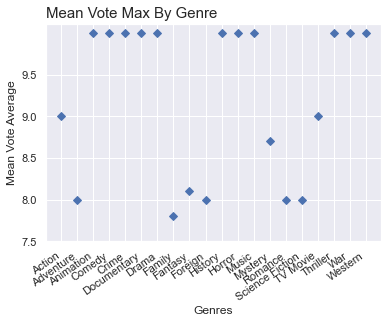

In [89]:
_ =plt.errorbar(x = stats.index, y='vote_average_max',data =stats, marker = 'D', linestyle='none')
_ = plt.xticks(rotation=35, ha='right')
_ = plt.yticks(np.arange(7.5,10,0.5)) 
_ = plt.xlabel('Genres')
_ = plt.ylabel('Mean Vote Average')
_ = plt.title("Mean Vote Max By Genre", loc="left", fontsize=15)
plt.show()

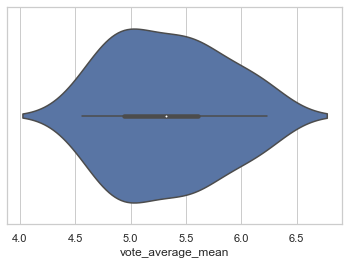

In [90]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x='vote_average_mean', data = stats)

In [91]:
mgk=movies['genres'].apply(lambda x: '_'.join((map(str,x))))

In [92]:
all_movies = movies.groupby(mgk).agg([np.mean, np.std]) 
all_movies

budget               popularity  \
                                           mean           std       mean   
genres                                                                     
                                   4.719209e+04  5.923161e+05   0.304807   
Action                             4.572418e+06  1.744645e+07   2.781620   
Action_Adventure                   1.074973e+07  3.400718e+07   3.673668   
Action_Adventure_Animation         3.500000e+05  1.106797e+06   3.758203   
Action_Adventure_Animation_Comedy  0.000000e+00  0.000000e+00   2.920726   
...                                         ...           ...        ...   
Western_Science Fiction            2.000000e+06           NaN   1.225217   
Western_TV Movie                   2.500000e+06  3.535534e+06   0.726138   
Western_Thriller                   2.333333e+06  4.041452e+06   2.560855   
Western_War                        0.000000e+00           NaN   0.515080   
Western_War_History_Romance        0.000000e+00           NaN   1.159273   

                                                  revenue                \
                                        std          mean           std   
genres                                                                    
                                   0.490416  7.639705e+04  2.505130e+06   
Action                             4.904922  1.080632e+07  9.359374e+07   
Action_Adventure                   6.680113  1.844821e+07  6.415925e+07   
Action_Adventure_Animation         2.459331  0.000000e+00  0.000000e+00   
Action_Adventure_Animation_Comedy  0.836934  0.000000e+00  0.000000e+00   
...                                     ...           ...           ...   
Western_Science Fiction                 NaN  0.000000e+00           NaN   
Western_TV Movie                   0.769727  0.000000e+00  0.000000e+00   
Western_Thriller                   2.842772  2.049000e+03  3.548972e+03   
Western_War                             NaN  0.000000e+00           NaN   
Western_War_History_Romance             NaN  0.000000e+00           NaN   

                                      runtime            vote_average  \
                                         mean        std         mean   
genres                                                                  
                                    69.984349  57.955564     4.239435   
Action                              98.446043  34.475476     5.444964   
Action_Adventure                   101.419355  41.122384     5.164516   
Action_Adventure_Animation          79.100000  26.134056     6.120000   
Action_Adventure_Animation_Comedy  115.000000   7.071068     6.900000   
...                                       ...        ...          ...   
Western_Science Fiction             87.000000        NaN     5.300000   
Western_TV Movie                   104.000000  22.627417     1.400000   
Western_Thriller                    96.000000   8.544004     4.866667   
Western_War                        105.000000        NaN     6.400000   
Western_War_History_Romance        113.000000        NaN     7.000000   

                                             vote_count              \
                                        std        mean         std   
genres                                                                
                                   3.069244    2.944308    9.940223   
Action                             1.700656   72.863309  348.051030   
Action_Adventure                   1.625052  114.881720  373.998019   
Action_Adventure_Animation         2.241428   73.000000   79.664575   
Action_Adventure_Animation_Comedy  0.000000   17.500000    3.535534   
...                                     ...         ...         ...   
Western_Science Fiction                 NaN    9.000000         NaN   
Western_TV Movie                   1.979899    2.000000    1.414214   
Western_Thriller                   1.628906   29.000000   36.592349   
Western_War                             NaN    5.0

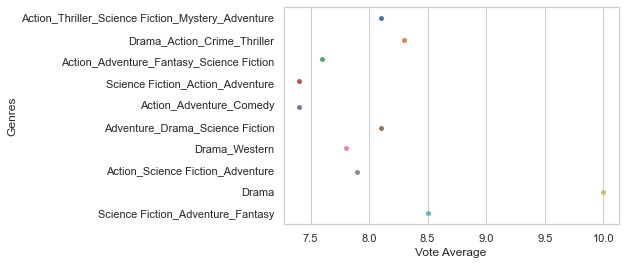

In [93]:
topmovies = movies.groupby(by=mgk)[['vote_average', 'vote_count']].max().sort_values(by='vote_count', ascending=False).head(10)
_ = sns.stripplot(data = topmovies, y=topmovies.index, x='vote_average', orient="h")
_ = plt.xlabel('Vote Average')
_ = plt.ylabel('Genres')
plt.show()

In [94]:
movies[mgk.str.contains('Drama')].describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,year,day,month,num_genres
count,2.024300e+04,20243.000000,2.024300e+04,20189.000000,20243.000000,20243.000000,20234.000000,20234.000000,20234.000000,20243.000000
mean,3.460486e+06,3.010777,7.943673e+06,103.050374,5.905888,96.570074,1990.747652,14.531778,6.600771,2.325890
std,1.297377e+07,4.422499,4.322779e+07,35.008632,1.696579,417.306082,24.427367,9.117530,3.589023,1.074516
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1893.000000,1.000000,1.000000,1.000000
25%,0.000000e+00,0.503283,0.000000e+00,90.000000,5.400000,4.000000,1975.000000,7.000000,3.000000,2.000000
50%,0.000000e+00,1.322188,0.000000e+00,100.000000,6.200000,11.000000,2000.000000,14.000000,7.000000,2.000000
75%,0.000000e+00,4.131608,0.000000e+00,114.000000,6.900000,37.000000,2010.000000,22.000000,10.000000,3.000000
max,2.500000e+08,154.801009,1.845034e+09,1256.000000,10.000000,12269.000000,2018.000000,31.000000,12.000000,8.000000


In [95]:
all_movies.columns

MultiIndex([(      'budget', 'mean'),
            (      'budget',  'std'),
            (  'popularity', 'mean'),
            (  'popularity',  'std'),
            (     'revenue', 'mean'),
            (     'revenue',  'std'),
            (     'runtime', 'mean'),
            (     'runtime',  'std'),
            ('vote_average', 'mean'),
            ('vote_average',  'std'),
            (  'vote_count', 'mean'),
            (  'vote_count',  'std'),
            (        'year', 'mean'),
            (        'year',  'std'),
            (         'day', 'mean'),
            (         'day',  'std'),
            (       'month', 'mean'),
            (       'month',  'std'),
            (  'num_genres', 'mean'),
            (  'num_genres',  'std')],
           )

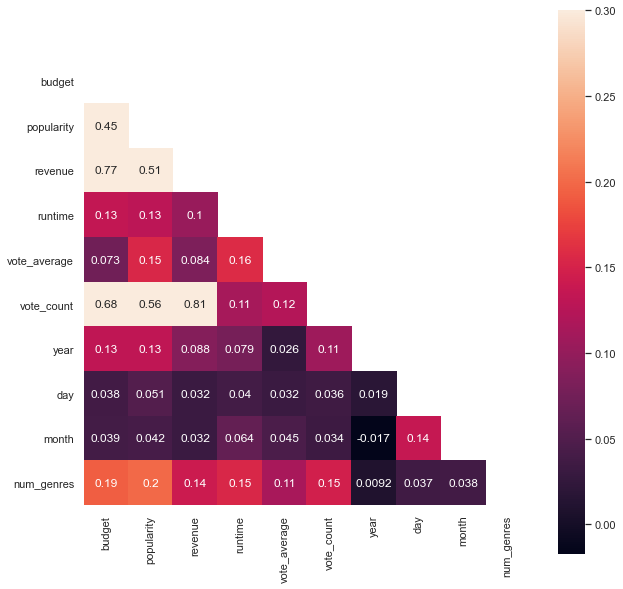

In [96]:
sns.set(font_scale = 1)
corr = movies.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
with sns.axes_style('white'):
    plt.figure(figsize = (10,10))
    _ = sns.heatmap(corr, mask= mask, vmax=.3, square=True, annot=True);

In [97]:
movies.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,year,day,month,num_genres
budget,1.000000,0.449682,0.768825,0.134700,0.073496,0.676699,0.131647,0.038129,0.038710,0.193298
popularity,0.449682,1.000000,0.506221,0.129912,0.154357,0.559995,0.131634,0.051035,0.041564,0.200612
revenue,0.768825,0.506221,1.000000,0.103948,0.083883,0.812031,0.088358,0.032208,0.031624,0.141640
runtime,0.134700,0.129912,0.103948,1.000000,0.158192,0.113555,0.078714,0.039660,0.063551,0.153820
vote_average,0.073496,0.154357,0.083883,0.158192,1.000000,0.123611,0.025829,0.032192,0.045071,0.114546
vote_count,0.676699,0.559995,0.812031,0.113555,0.123611,1.000000,0.106797,0.035702,0.033967,0.146425
year,0.131647,0.131634,0.088358,0.078714,0.025829,0.106797,1.000000,0.018550,-0.017248,0.009189
day,0.038129,0.051035,0.032208,0.039660,0.032192,0.035702,0.018550,1.000000,0.136824,0.037087
month,0.038710,0.041564,0.031624,0.063551,0.045071,0.033967,-0.017248,0.136824,1.000000,0.038321
num_genres,0.193298,0.200612,0.141640,0.153820,0.114546,0.146425,0.009189,0.037087,0.038321,1.000000


In [98]:
movies.corr()['vote_average'].sort_values(ascending=False)

vote_average    1.000000
runtime         0.158192
popularity      0.154357
vote_count      0.123611
num_genres      0.114546
revenue         0.083883
budget          0.073496
month           0.045071
day             0.032192
year            0.025829
Name: vote_average, dtype: float64

In [99]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x=col,  y= 'vote_average', data=movies, alpha=0.5)
        ax.set(xlabel=col, ylabel='Vote Average')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [100]:
features = [col for col in movies.columns if col in ['revenue', 'popularity', 'vote_count', 'runtime', 'budget', 'num_genres', 'month', 'day', 'year']]

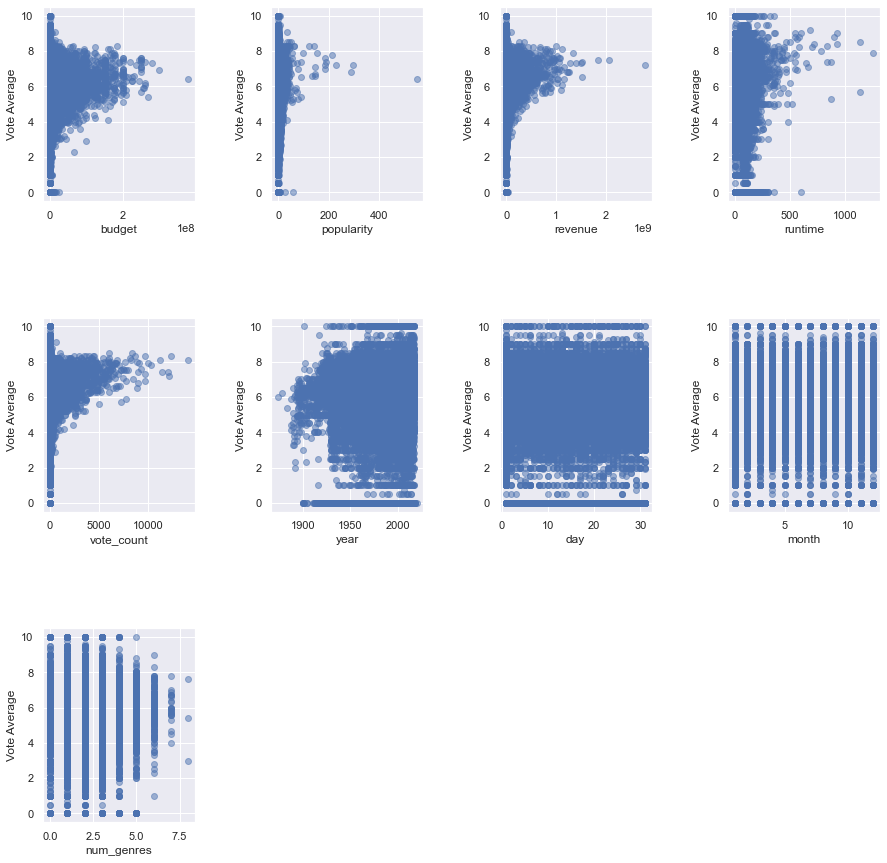

In [101]:
scatterplots(features, ncol=4, figsize=(15, 15))

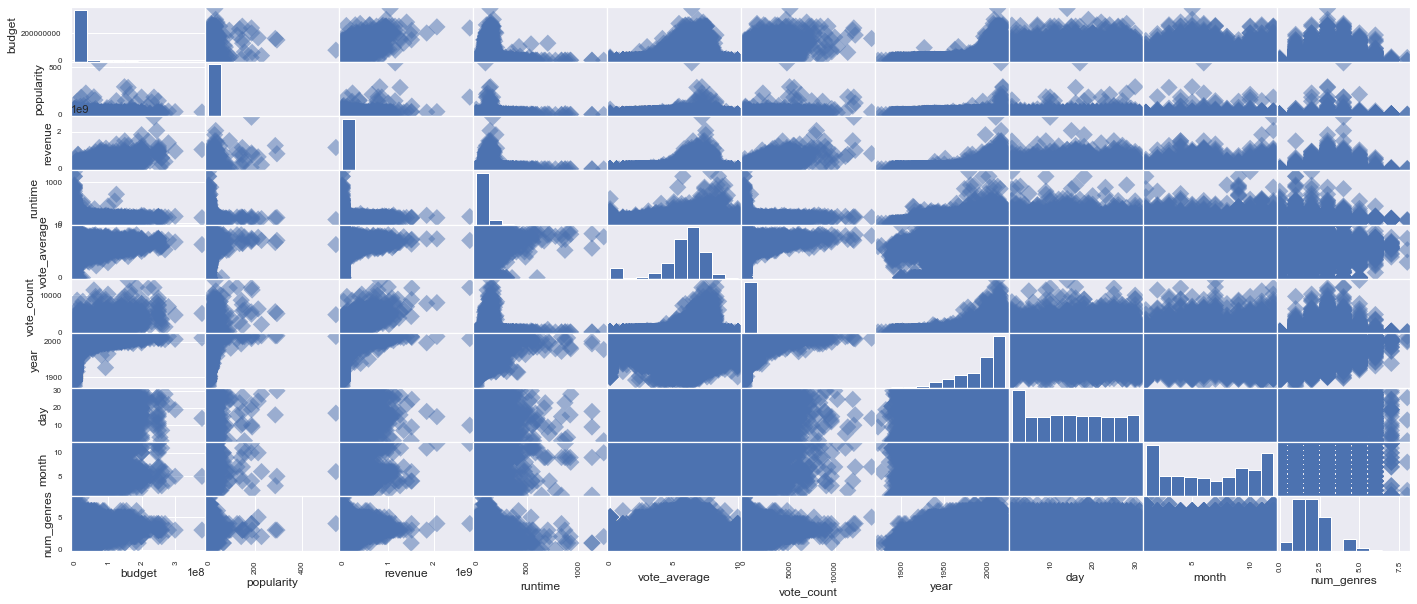

In [102]:
_= pd.plotting.scatter_matrix(movies,figsize=[24,10], s = 150, marker = 'D')

C:\Users\sathw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


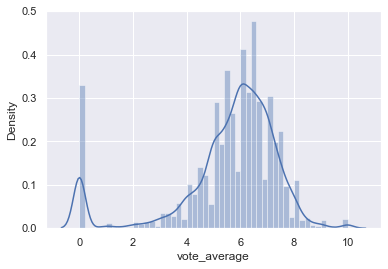

In [103]:
_ = sns.distplot(movies['vote_average'])
plt.show()

C:\Users\sathw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


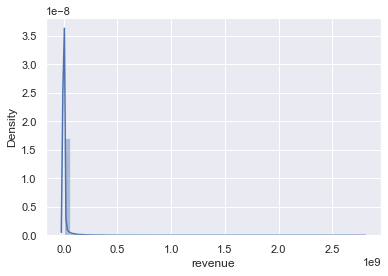

In [104]:
_ = sns.distplot(movies['revenue'])
plt.show()

## Part II.) Ratings dataset Merge

In [105]:
ratings = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/IMDB-Movie-Ratings/rawdata/ratings.csv', nrows = 2600000)
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [106]:
ratings = ratings.rename(columns = {'movieId': 'id'})

In [107]:
ratings.id = ratings.id.astype(int)

In [108]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit= 's')

In [109]:
ratings['timestamp']

0         2015-03-09 22:52:09
1         2015-03-09 23:07:15
2         2015-03-09 22:52:03
3         2015-03-09 22:52:26
4         2015-03-09 22:52:36
                  ...        
2599995   2003-08-09 11:36:35
2599996   2002-12-25 23:21:00
2599997   2006-03-20 15:27:47
2599998   2003-08-18 15:54:40
2599999   2003-08-18 16:00:20
Name: timestamp, Length: 2600000, dtype: datetime64[ns]

In [110]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600000 entries, 0 to 2599999
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   id         int32         
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 69.4 MB


In [111]:
ratings.shape

(2600000, 4)

In [112]:
ratings.userId.nunique()

27047

In [113]:
ratings.head(10)

,userId,id,rating,timestamp
0,1,110,1.0,2015-03-09 22:52:09
1,1,147,4.5,2015-03-09 23:07:15
2,1,858,5.0,2015-03-09 22:52:03
3,1,1221,5.0,2015-03-09 22:52:26
4,1,1246,5.0,2015-03-09 22:52:36
5,1,1968,4.0,2015-03-09 23:02:28
6,1,2762,4.5,2015-03-09 22:48:20
7,1,2918,5.0,2015-03-09 22:53:13
8,1,2959,4.0,2015-03-09 22:53:21
9,1,4226,4.0,2015-03-09 23:03:48


In [114]:
#checking how many null values there are for each column/feature
missing = pd.concat([ratings.isnull().sum(), 100 * ratings.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
userId,0,0.0
id,0,0.0
rating,0,0.0
timestamp,0,0.0


In [115]:
ratings.rating = 2*ratings.rating

In [116]:
ratings.rating.value_counts().sort_values(ascending=False)

8.0     703710
6.0     535968
10.0    376351
7.0     310489
9.0     214188
4.0     176983
5.0     123399
2.0      83613
3.0      38177
1.0      37122
Name: rating, dtype: int64

Text(0, 0.5, 'count')

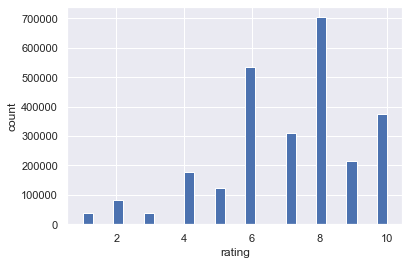

In [117]:
ratings.rating.hist(bins=30)
plt.xlabel('rating')
plt.ylabel('count')

In [118]:
ratings.rating.mean()

7.059199615384616

In [119]:
ratings.rating.std(ddof=0)

2.112096029184034

In [120]:
movies['id'] = movies['id'].astype(int)
#pd.to_numeric(movies['id'], errors = 'coerce')
#movies[movies['id']== '8/20/1997']

In [121]:
movies.shape

(45430, 27)

In [122]:
movies.id

title
Toy Story                         862
Jumanji                          8844
Grumpier Old Men                15602
Waiting to Exhale               31357
Father of the Bride Part II     11862
                                ...  
Subdue                         439050
Century of Birthing            111109
Betrayal                        67758
Satan Triumphant               227506
Queerama                       461257
Name: id, Length: 45430, dtype: int32

In [123]:
ratings.id.nunique()

25560

In [124]:
ratings.userId.nunique()

27047

In [125]:
movies.id.nunique()

45430

In [126]:
combined_df = pd.merge(movies,ratings, on ='id', how='left')

In [127]:
combined_df.info()           

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183206 entries, 0 to 1183205
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   adult                  1183206 non-null  object        
 1   belongs_to_collection  275952 non-null   object        
 2   budget                 1183206 non-null  float64       
 3   genres                 1183206 non-null  object        
 4   homepage               281360 non-null   object        
 5   id                     1183206 non-null  int32         
 6   imdb_id                1183180 non-null  object        
 7   original_language      1183193 non-null  object        
 8   original_title         1183206 non-null  object        
 9   overview               1178266 non-null  object        
 10  popularity             1183206 non-null  float64       
 11  poster_path            1181842 non-null  object        
 12  production_companies   11832

In [128]:
combined_df.shape

(1183206, 30)

In [129]:
combined_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year,day,month,num_genres,userId,rating
count,1.183206e+06,1.183206e+06,1.183206e+06,1.183206e+06,1.182867e+06,1.183206e+06,1.183206e+06,1.182404e+06,1.182404e+06,1.182404e+06,1.183206e+06,1.143571e+06,1.143571e+06
mean,1.912366e+07,1.079739e+04,7.854956e+00,7.237566e+07,1.080995e+02,6.584738e+00,6.413840e+02,1.987447e+03,1.518177e+01,6.932811e+00,2.409820e+00,1.347564e+04,7.062312e+00
std,3.731519e+07,3.423603e+04,6.648255e+00,1.727673e+08,2.598008e+01,1.125276e+00,1.201326e+03,2.156605e+01,9.149474e+00,3.533301e+00,1.057717e+00,7.803694e+03,2.120801e+00
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.874000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,0.000000e+00,5.090000e+02,2.686234e+00,0.000000e+00,9.400000e+01,6.100000e+00,2.500000e+01,1.975000e+03,7.000000e+00,4.000000e+00,2.000000e+00,6.672000e+03,6.000000e+00
50%,1.073000e+06,1.580000e+03,7.274948e+00,1.108462e+06,1.050000e+02,6.800000e+00,1.470000e+02,1.996000e+03,1.500000e+01,7.000000e+00,2.000000e+00,1.338700e+04,8.000000e+00
75%,2.200000e+07,3.396000e+03,1.126747e+01,6.867323e+07,1.200000e+02,7.300000e+00,6.300000e+02,2.004000e+03,2.300000e+01,1.000000e+01,3.000000e+00,2.028400e+04,8.000000e+00
max,3.800000e+08,4.691720e+05,5.474883e+02,2.787965e+09,1.256000e+03,1.000000e+01,1.407500e+04,2.020000e+03,3.100000e+01,1.200000e+01,8.000000e+00,2.704700e+04,1.000000e+01


In [130]:
combined_df['id'].value_counts()

318      9231
296      8764
593      8451
260      7747
480      7521
         ... 
38510       1
48747       1
42600       1
56935       1
40471       1
Name: id, Length: 45430, dtype: int64

In [131]:
combined_df.groupby(by='original_title')['rating'].count().sort_values(ascending=False).head(10)

original_title
The Million Dollar Hotel              9231
Terminator 3: Rise of the Machines    8764
Солярис                               8451
The 39 Steps                          7747
Monsoon Wedding                       7521
Once Were Warriors                    6853
Trois couleurs : Rouge                6639
License to Wed                        6056
La passion de Jeanne d'Arc            5783
48 Hrs.                               5774
Name: rating, dtype: int64

In [132]:
combined_df.isnull().sum().sort_values(ascending=False)

belongs_to_collection    907254
homepage                 901846
tagline                  371458
timestamp                 39635
userId                    39635
rating                    39635
overview                   4940
poster_path                1364
release_date                802
month                       802
year                        802
day                         802
runtime                     339
status                      150
imdb_id                      26
original_language            13
video                         0
num_genres                    0
budget                        0
genres                        0
id                            0
popularity                    0
original_title                0
vote_average                  0
production_companies          0
production_countries          0
vote_count                    0
revenue                       0
spoken_languages              0
adult                         0
dtype: int64

In [133]:
combined_df[combined_df['rating'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,year,day,month,num_genres,userId,rating,timestamp
45,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,False,6.5,92.0,1995.0,22.0,12.0,2,NaN,NaN,NaT
46,FALSE,NaN,16000000.0,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,False,6.1,34.0,1995.0,22.0,12.0,3,NaN,NaN,NaT
47,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,False,5.7,173.0,1995.0,10.0,2.0,1,NaN,NaN,NaT
269,FALSE,NaN,58000000.0,"[Comedy, Romance]",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,False,6.2,141.0,1995.0,15.0,12.0,2,NaN,NaN,NaT
270,FALSE,NaN,0.0,"[Action, Adventure, Drama, Family]",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,False,5.4,45.0,1995.0,22.0,12.0,4,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183200,FALSE,NaN,0.0,"[Drama, Action, Romance]",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,False,5.7,26.0,1991.0,13.0,5.0,3,NaN,NaN,NaT
1183201,FALSE,NaN,0.0,"[Drama, Family]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,False,4.0,1.0,NaN,NaN,NaN,2,NaN,NaN,NaT
1183203,FALSE,NaN,0.0,"[Action, Drama, Thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,False,3.8,6.0,2003.0,1.0,8.0,3,NaN,NaN,NaT
1183204,FALSE,NaN,0.0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,False,0.0,0.0,1917.0,21.0,10.0,0,NaN,NaN,NaT


In [134]:
combined_df['status'].value_counts()

Released           1180955
Rumored               1876
Post Production        146
In Production           62
Planned                 15
Canceled                 2
Name: status, dtype: int64

In [135]:
combined_df = combined_df.dropna(subset=['year','month','day','rating'])

In [136]:
model_df = combined_df.drop(['tagline', 'overview', 'poster_path', 
                               'imdb_id', 'id', 'userId', 'video', 'release_date', 'status','timestamp'], axis = 1)

In [137]:
#fill_cols = ['belongs_to_collection', 'homepage', 'tagline', 'overview', 'poster_path', 
#             'original_language', 'status', 'imdb_id', 'release_date']
#for col in fill_cols:
#    combined_df[col].fillna(' ', inplace=True)

In [138]:
model_df.isnull().sum().sort_values(ascending=False)

belongs_to_collection    870552
homepage                 868936
runtime                      91
original_language             3
rating                        0
production_companies          0
budget                        0
genres                        0
original_title                0
popularity                    0
production_countries          0
num_genres                    0
revenue                       0
spoken_languages              0
vote_average                  0
vote_count                    0
year                          0
day                           0
month                         0
adult                         0
dtype: int64

In [139]:
#combined_df['runtime'].fillna(combined_df['runtime'].mean(), inplace=True)

In [140]:
#cols_fill = ['year', 'month', 'day']
#for col in cols_fill:
#    combined_df[col] = combined_df[col].fillna(combined_df[col].mean())

In [141]:
combined_df['rating'].value_counts().head(10)

8.0     313827
6.0     258086
10.0    177612
7.0     115695
4.0      81467
9.0      80798
5.0      47032
2.0      39270
3.0      14859
1.0      14204
Name: rating, dtype: int64

In [142]:
combined_df['id'].nunique()

5792

In [143]:
combined_df['userId'].nunique()

26543

In [144]:
#combined_df['userId'] = combined_df['userId'].astype(int)

In [145]:
combined_df['userId'].value_counts().head(10)

8659.0     3022
24025.0    1346
3437.0     1092
25808.0    1059
5829.0     1059
5620.0     1024
13839.0    1003
19580.0     998
6513.0      974
17211.0     973
Name: userId, dtype: int64

In [146]:
combined_df.groupby('original_title')['rating'].mean().reset_index(name= 'rating')

,original_title,rating
0,!Women Art Revolution,6.119565
1,$5 a Day,4.888889
2,'Gator Bait,7.047619
3,'R Xmas,6.600000
4,'Twas the Night Before Christmas,7.512195
...,...,...
5709,헬로우 고스트,6.588235
5710,형사 Duelist,7.000000
5711,활,7.714894
5712,회사원,7.000000


In [147]:
ratings_df = pd.DataFrame(combined_df.groupby('original_title')['rating'].mean())  
  
ratings_df['num_ratings'] = pd.DataFrame(combined_df.groupby('original_title')['rating'].count()) 
  
ratings_df.sort_values(by='num_ratings', ascending=False).head(10) 

,rating,num_ratings
original_title,,
The Million Dollar Hotel,8.833604,9231
Terminator 3: Rise of the Machines,8.370379,8764
Солярис,8.298545,8451
The 39 Steps,8.243449,7747
Monsoon Wedding,7.305544,7521
Once Were Warriors,8.508099,6853
Trois couleurs : Rouge,8.023949,6639
License to Wed,8.448151,6056
La passion de Jeanne d'Arc,6.774511,5783


In [148]:
return_df = pd.DataFrame(combined_df.groupby('original_title')[['budget', 'revenue']].mean())
return_df['profit'] = return_df['revenue'] - return_df['budget']
return_df.sort_values(by='profit', ascending=False)[0:9]

,budget,revenue,profit
original_title,,,
Titanic,1.469177e+08,1.321298e+09,1.174380e+09
Avengers: Age of Ultron,2.800000e+08,1.405404e+09,1.125404e+09
The Lord of the Rings: The Return of the King,9.400000e+07,1.118889e+09,1.024889e+09
Pirates of the Caribbean: Dead Man's Chest,2.000000e+08,1.065660e+09,8.656598e+08
Jurassic Park,6.300000e+07,9.201000e+08,8.571000e+08
Harry Potter and the Philosopher's Stone,1.250000e+08,9.764756e+08,8.514756e+08
The Lord of the Rings: The Two Towers,7.900000e+07,9.262874e+08,8.472874e+08
Finding Nemo,9.400000e+07,9.403355e+08,8.463355e+08
The Dark Knight,1.850000e+08,1.004558e+09,8.195584e+08


C:\Users\sathw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


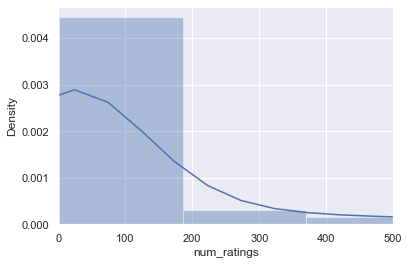

In [149]:
_ = sns.distplot(ratings_df['num_ratings'])
_ = plt.xlim([0,500])
plt.show()

C:\Users\sathw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


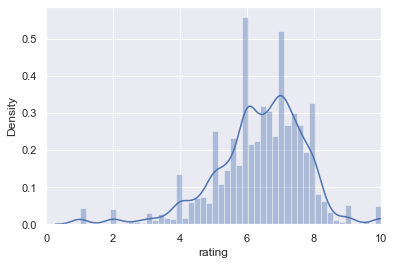

In [150]:
_ = sns.distplot(ratings_df['rating'])
_ = plt.xlim([0,10])
plt.show()

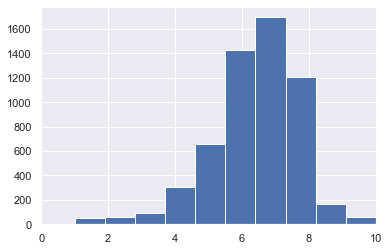

In [151]:
_ = plt.hist(ratings_df['rating'], bins=10)
_ = plt.xlim([0,10])
plt.show()

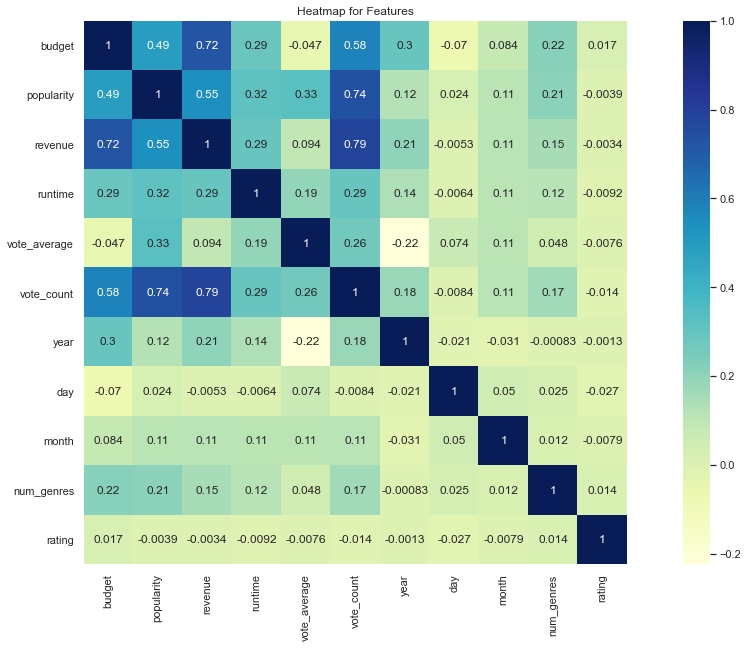

In [152]:
_ = plt.figure(figsize=(20,10))
_ = sns.heatmap(model_df.corr(), square=True, cmap="YlGnBu", annot=True)
_ = plt.title("Heatmap for Features")
plt.show()

In [153]:
model_df.dtypes

adult                     object
belongs_to_collection     object
budget                   float64
genres                    object
homepage                  object
original_language         object
original_title            object
popularity               float64
production_companies      object
production_countries      object
revenue                  float64
runtime                  float64
spoken_languages          object
vote_average             float64
vote_count               float64
year                     float64
day                      float64
month                    float64
num_genres                 int64
rating                   float64
dtype: object

In [154]:
model_df['original_language'].fillna('', inplace=True)

In [155]:
#model_df = model_df.dropna(['rating','month', 'day', 'year'])

In [156]:
model_df.isnull().sum()

adult                         0
belongs_to_collection    870552
budget                        0
genres                        0
homepage                 868936
original_language             0
original_title                0
popularity                    0
production_companies          0
production_countries          0
revenue                       0
runtime                      91
spoken_languages              0
vote_average                  0
vote_count                    0
year                          0
day                           0
month                         0
num_genres                    0
rating                        0
dtype: int64

In [157]:
model_df['spoken_languages'] = model_df['spoken_languages'].fillna('[]').apply(ast.literal_eval)
model_df['spoken_languages'] = model_df['spoken_languages'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [158]:
model_df['production_companies'] = model_df['production_companies'].fillna('[]').apply(ast.literal_eval)
model_df['production_companies'] = model_df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [159]:
def feat_eng(df):
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda b: 0 if b == np.nan else 1)
    df['homepage'] = df['homepage'].apply(lambda b: 0 if b == np.nan else 1)
    df['original_language'] = df['original_language'].apply(lambda l: 1 if l == 'en' else 0)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['spoken_languages'] = df['spoken_languages'].apply(lambda s: 1 if s == 'English' else 0)
    df['runtime'] = df['runtime'].fillna(combined_df['runtime'].mean())
    df = df.drop(['original_title', 'adult','genres'], axis=1)
    return df

In [160]:
type(model_df)

pandas.core.frame.DataFrame

In [161]:
print("shape of the dataset: ", model_df.shape)

shape of the dataset:  (1142850, 20)


In [162]:
small_df = model_df.sample(frac = 0.02, axis=0)

In [163]:
small_df.shape

(22857, 20)

In [164]:
X,y=small_df.drop(['revenue'], axis=1), small_df['revenue']

In [165]:
X = feat_eng(X)

In [166]:
type(X)

pandas.core.frame.DataFrame

In [167]:
X.shape

(22857, 16)

In [168]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#features= ['budget', 'popularity','revenue','runtime', 'vote_average', 'vote_count', 'month', 'day', 'year']
#X,y = combined_df[features].values, combined_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 241)

rf_model = RandomForestRegressor(n_estimators=1000, random_state = 241)
rf_model.fit(X_train,y_train)

print("R^2 Training Score: {:.3f}".format(rf_model.score(X_train, y_train)))
print('score on test set: {:.3f}'.format(rf_model.score(X_test, y_test)))

for name, importance in zip(features, rf_model.feature_importances_):
    print(name, "=", importance)

R^2 Training Score: 0.999
score on test set: 0.995
budget = 0.0
popularity = 0.11597374350719482
revenue = 0.0
runtime = 0.00015779367204638703
vote_count = 0.008428697538744818
year = 0.0103772916950925
day = 0.0015321288466046581
month = 0.13178975221520378
num_genres = 0.0


In [169]:
np.unique(y_test, return_counts=True)

(array([0.00000000e+00, 3.00000000e+01, 1.21000000e+02, 7.23500000e+03,
        1.74790000e+04, 1.91810000e+04, 2.45170000e+04, 2.45910000e+04,
        2.58000000e+04, 3.08570000e+04, 3.27880000e+04, 4.63520000e+04,
        4.64740000e+04, 7.37060000e+04, 8.33050000e+04, 9.50000000e+04,
        9.65680000e+04, 1.38000000e+05, 1.73066000e+05, 2.18626000e+05,
        2.63404000e+05, 3.74743000e+05, 4.18961000e+05, 4.28868000e+05,
        4.47741000e+05, 4.57163000e+05, 4.60226000e+05, 5.01818000e+05,
        5.28428000e+05, 5.53171000e+05, 5.80527000e+05, 5.85604000e+05,
        5.96349000e+05, 6.16938000e+05, 6.50422000e+05, 6.74918000e+05,
        7.05308000e+05, 7.19968000e+05, 9.40944000e+05, 1.01218900e+06,
        1.10846200e+06, 1.17900200e+06, 1.18578300e+06, 1.19306200e+06,
        1.27052200e+06, 1.27740100e+06, 1.42274900e+06, 1.45800000e+06,
        1.50178500e+06, 1.53125100e+06, 1.53555800e+06, 1.57462300e+06,
        1.61501800e+06, 1.73861100e+06, 1.79418700e+06, 1.928985

In [170]:
from sklearn.metrics import explained_variance_score

y_pred = rf_model.predict(X_test)
explained_variance_score(y_test, y_pred)

0.9951181913188737

In [171]:
print(y_pred[:10])

[1.44056873e+08 1.15628965e+07 0.00000000e+00 0.00000000e+00
 1.43580330e+07 0.00000000e+00 1.06269971e+08 0.00000000e+00
 0.00000000e+00 9.38881800e+07]


In [172]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1427276.140392301

In [173]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

140825472133934.22

In [174]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, y_pred)

13.3570085469719

In [175]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.9951133354032824

In [176]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, y_pred)

0.0

In [177]:
print(X_train.shape, X_test.shape)

(17142, 16) (5715, 16)


In [178]:
scores = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=10)
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final RMSE: ", final_avg_rmse)

Final RMSE:  9672314.200323453


In [179]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop=2000,num=10)]
max_depth = [int(x) for x in np.linspace(start = 2, stop= 20, num=10)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap =[True,False]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(rf_model,random_grid,n_iter=100,cv=5,verbose=1,random_state=241,n_jobs=-1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 78.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 178.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 198.8min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=1000,
                                                   random_state=241),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=241, verbose=1)

In [182]:
ypred_rf = rf_random.predict(X_test)
print(ypred_rf[:10])

[1.44054043e+08 1.11355822e+07 1.14167801e+04 3.90504492e+04
 1.43579411e+07 3.14131750e+03 1.06269971e+08 4.53987903e+03
 7.74207058e+02 9.38606905e+07]


In [184]:
r2_score(y_test, ypred_rf, multioutput='variance_weighted')

0.9950950100680075

In [180]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 100, random_state=0)
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)


for name, importance in zip(features, gbr.feature_importances_):
    print(name, "=", importance)

budget = 0.0
popularity = 0.2118408276496167
revenue = 0.0
runtime = 0.0
vote_count = 0.006333705354372088
year = 0.007060701420072937
day = 0.0003192801533364828
month = 0.10776501625777624
num_genres = 0.0


In [181]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

#params = {'estimator__learning_rate': [0.05, 0.10, 0.15, 0.2],
#          'estimator__max_depth': [80, 90, 100, 110],
#          'estimator__min_samples_leaf': [3, 4, 5],
#          'estimator__min_samples_split': [8, 10, 12],
#         'estimator__n_estimators': [100, 200, 300]}
params = {'learning_rate': [0.01,0.05,0.10,0.20],
          'subsample'    : [0.9, 0.5, 0.2, 0.1],
          'n_estimators' : [100,500,1000, 1500],
          'max_depth'    : [6,8,10,12]}

gcv = GridSearchCV(GradientBoostingRegressor(),param_grid= params, scoring = 'neg_mean_squared_error', cv=10, verbose=1,n_jobs=-1)
gcv.fit(X_train, y_train)
print("Best parameters: ", gcv.best_params_)
print("lowest RMSE found: ", np.sqrt(np.abs(gcv.best_score_)))

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 65.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 137.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 223.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 315.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 1028.3min


KeyboardInterrupt: 

In [ ]:
gcv.get_params().keys()

In [ ]:
import xgboost as xgb
housing_dmatrix = xgb.DMatrix(data = X, label = y)
gbm_param_grid = {'learning_rate': [0.01, 0.1, 0.5, 0.9],
                 'n_estimators':[200],
                  'subsample': [0.3, 0.5, 0.9]
                 }
gbm = xgb.XGBRegressor()
grid_mse = GridSearchCV(gbm, param_grid = gbm_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_mse.fit(X, y)
print('Best parameters found: ', grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

In [ ]:
scores2 = cross_val_score(gbm, X, y, scoring='neg_mean_squared_error', cv=10)
final_avg_rmse2 = np.mean(np.sqrt(np.abs(scores2)))
print("Final RMSE: ", final_avg_rmse2)